<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://curso.infnet.com.br/c/wp-content/uploads/sites/5/2022/12/Infnet-Logo.png" height="350" width="350">
</div>

<p><b><font size = 5 face = 'verdana'> NLP com Python [25E2_2] - PROJETO FINAL</font></b></p>
<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de Processamento de linguagem natural com Python [25E2_2] do MIT em Inteligência Artificial, Machine Learning e Deep Learning, Instituto INFNET, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> Fernando Guimarães Ferreira<br>
<b>ALUNO:</b> Osemar da Silva Xavier<br>
<b>E-MAIL:</b> osemar.xavier@al.infnet.edu.br<br>
<hr>
<p><font size = 3 face = 'verdana'>
<hr></hr>

<h4><b><u>Descrição do projeto:</u></b></h4>

<p>Bem-vindo ao projeto de disciplina de <b>Processamento de Linguagem Natural (PLN)</b> com Python.
Ao longo das últimas aulas, exploramos uma série de aplicações que demonstraram a amplitude de possibilidades ao trabalhar com textos.
Para isso, utilizamos diversas bibliotecas, destacando-se:</p>

<ol>
    <li><b>NLTK</b></li>
    <li><b>Spacy</b></li>
    <li><b>Gensim</b></li>
</ol>

<p>Este notebook servirá como guia para a execução de uma <b>análise de tópicos completa</b>,
utilizando o algoritmo de <b>LDA (Latent Dirichlet Allocation)</b> e recursos para interpretação dos resultados.
Os dados utilizados são notícias da seção <i>"Mercado"</i> extraídas da <b>Folha de S. Paulo</b> no ano de 2016.</p>

<p>Complete a análise com os códigos que considerar pertinentes e responda às questões presentes no Moodle.
<b>Boa sorte!</b></p>

<hr>

<h4><b><u>O Notebook</u></b></h4>

<p>Neste notebook, você será guiado pela análise de <b>Extração de Tópicos</b>.
As seguintes tarefas serão realizadas:</p>

<ol>
    <li><b>Download dos dados</b> provenientes do Kaggle.</li>
    <li><b>Seleção dos dados relevantes</b> para a nossa análise.</li>
    <li><b>Instalação das principais ferramentas</b> e importação de módulos.</li>
    <li><b>Pré-processamento usando NLTK</b>.</li>
    <li><b>Pré-processamento usando Spacy</b>.</li>
    <li><b>Análise de tópicos utilizando LDA</b>.</li>
    <li><b>Análise de NER (Reconhecimento de Entidades Nomeadas)</b> usando Spacy.</li>
    <li><b>Visualização dos tópicos</b> utilizando tokens e entidades.</li>
</ol>
<h4><b><u>Objetivo</u></b></h4>

<p>O código possui lacunas e é necessário completá-las (Normalmente denotadas por comentários "ESCREVA AQUI").


 Abra o notebook no Colab notebook e complete o código para realizar a análise completa. O objetivo é separar notícias em português em 9 tópicos distintos. No fim, você irá gerar uma nuvem de palavras e outra nuvem de entidades para cada um dos tópicos.

Após a finalização do código, responda as questões relacionadas às competências</p>



<hr>

<p><b>Nota:</b> Utilize boas práticas de programação e documente cada etapa para facilitar a compreensão e replicação dos resultados.</p>


<h2><b>1. Download dos dados - Pipeline de Acesso a Dados via API Kaggle no Google Colab</b></h2>

---

<h3><b>1a. Configuração do Ambiente da API Kaggle</b></h3>

- Primeiramente fiz a importação da biblioteca <code>os</code> para manipular variáveis de ambiente.
- Em seguida criei a variável <code>KAGGLE_CONFIG_DIR</code> apontando para o diretório padrão <code>/root/.kaggle</code>.
- Para garanbtir a existência da pasta coloquei o arquivo <code>kaggle.json</code> contendo as credenciais de acesso.
- Por fim, defini as permissões corretas do arquivo para segurança.

In [12]:
from google.colab import files
files.upload()  # Faça o upload do arquivo kaggle.json gerado na sua conta Kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oserxavier","key":"6fc5124c867a419e49d4c28c227268a4"}'}

In [13]:
# Configuração do ambiente do Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

<hr>
<h3><b>1b. Fazer o Download do Dataset via API Kaggle</b></h3>
Utilizei o comando <code>kaggle datasets download</code> para baixar diretamente o dataset desejado.

O parâmetro <code>--force</code> garante que o download seja feito mesmo se o arquivo já existir.

In [14]:
# Download do dataset
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 57% 107M/187M [00:00<00:00, 1.12GB/s]
100% 187M/187M [00:00<00:00, 698MB/s] 


<hr>
<h3><b>1c. Nessa etapa fiz a extração  do Arquivo ZIP e Verifiquei os Arquivos Extraídos</b></h3>
Em seguida fiz a extração dos arquivos compactados usando o comando <code>unzip -o</code>, que sobrescreve arquivos existentes sem solicitar confirmação.

O comando <code>ls</code> lista o arquivo, no caso "articles.csv".

In [15]:
# Extrair o arquivo ZIP e verificar os arquivos extraídos
!unzip -o news-of-the-site-folhauol.zip -d ./news_folhauol
!ls ./news_folhauol

Archive:  news-of-the-site-folhauol.zip
  inflating: ./news_folhauol/articles.csv  
articles.csv


<hr>
<h2><b>2. Seleção dos dados relevantes para a nossa análise</b></h2>
<h3><b>2a. Fazer o Download do Dataset via API Kaggle</b></h3>
Criei o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [16]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()
df = pd.read_csv("./news_folhauol/articles.csv")
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


<hr>
<h2><b>3. Instalação das principais ferramentas e importação de módulos.</b></h2>
<h3><b>3a. Atualizar o SPACY e instalar os modelos pt_core_news_lg</b></h3>
Fiz a instalação e a atualização do <b>Spacy/ pt_core_news_lg</b>

In [17]:
!pip install -U spacy
!python -m spacy download pt_core_news_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 3.1 MB/s eta 0:00:00
✔ Download and installation successful
You c

In [18]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# Carregar o modelo de linguagem em português
nlp = spacy.load("pt_core_news_lg")


<h3><b>3b. Instalar os datasets <code>stopwords</code>, <code>punkt</code> e <code>rslp</code> do nltk</b></h3>

<p>Para realizar pré-processamento de textos em português com <code>NLTK</code> (Natural Language Toolkit), fiz a instalação de alguns recursos fundamentais para o projeto. Abaixo explico a função de cada um:</p>

---

<h4><b><code>stopwords</code> — Lista de Palavras Vazias</b></h4>

<ul>
  <li>As <b>stopwords</b> são palavras comuns que geralmente não agregam significado relevante ao texto, como <i>de, a, o, que, por, com</i>.</li>
  <li>Essas palavras são removidas durante o pré-processamento de textos para evitar ruído na análise.</li>
  <li>O NLTK disponibiliza listas de stopwords em diversos idiomas, incluindo o português.</li>
</ul>

<pre><code>from nltk.corpus import stopwords
stopwords.words('portuguese')
</code></pre>

---

<h4><b><code>punkt</code> — Tokenizador Baseado em Pontuação</b></h4>

<ul>
  <li>É um modelo treinado para <b>tokenizar textos</b>, ou seja, dividir frases em palavras ou sentenças com base na pontuação e estrutura.</li>
  <li>Ele é utilizado por trás de funções como <code>word_tokenize</code> e <code>sent_tokenize</code>.</li>
  <li>Mesmo sendo baseado em regras e estatísticas, funciona bem para vários idiomas.</li>
</ul>

<pre><code>from nltk.tokenize import word_tokenize
tokens = word_tokenize("Olá, tudo bem?")
</code></pre>

---

<h4><b><code>rslp</code> — Stemmer para o Português</b></h4>

<ul>
  <li>O <b>RSLP</b> (Removedor de Sufixos da Língua Portuguesa) é um algoritmo de stemming que reduz palavras ao seu radical.</li>
  <li>Por exemplo, transforma <i>jogando</i>, <i>jogador</i> e <i>jogo</i> em <code>jog</code>.</li>
  <li>É útil para normalizar o vocabulário antes da vetorização em modelos de NLP.</li>
</ul>

<pre><code>from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
stemmer.stem("amando")  # retorna: 'am'
</code></pre>

---

<h4><b>Como instalar os três:</b></h4>

<pre><code>import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')
</code></pre>


In [19]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

<h3><b>3c. NLTK Tokenizer and Stemmer</b></h3>

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from typing import List

def tokenize(text: str) -> List:
    tokens = word_tokenize(text.lower())
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return stemmed_tokens

<h3><b>3d. Carregar os módulos usados ao longo desse notebook</b></h3>

In [25]:
!pip install pyLDAvis >/dev/null

In [26]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any

SEED = 123

<h3><b>3e. Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"</b></h3>

In [27]:
# Converter a coluna de datas para o formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrar as notícias de 2016 e da categoria "Mercado"
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')]

# Verificar as primeiras linhas do DataFrame filtrado
news_2016.head()

,title,text,date,category,subcategory,link
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


<h3><b>4. Criar um documento <code>spaCy</code> para cada texto do dataset</b></h3>

<p>
A biblioteca <code>spaCy</code> é uma das ferramentas mais poderosas para Processamento de Linguagem Natural (PLN). Nesta etapa, aplicamos o modelo pré-treinado <code>pt_core_news_lg</code> da spaCy para analisar os textos contidos no dataset filtrado <code>news_2016</code>.
</p>

---

<h4><b>Objetivo</b></h4>

<p>
Gerar, para cada linha do nosso DataFrame, um objeto <code>Doc</code> do spaCy — que representa a estrutura linguística de um texto. Esse objeto conterá informações ricas, como:
</p>

<ul>
  <li>Tokens já lematizados</li>
  <li>Etiquetas gramaticais (POS tagging)</li>
  <li>Entidades nomeadas (NER)</li>
  <li>Árvore de dependência sintática</li>
</ul>

---

<h4><b> Etapas realizadas</b></h4>

<ol>
  <li><b>Importação</b> da biblioteca <code>spaCy</code> e do <code>tqdm</code> para barra de progresso.</li>
  <li><b>Carregamento</b> do modelo <code>pt_core_news_lg</code>, que traz embeddings, regras linguísticas e vetores semânticos para o português.</li>
  <li><b>Aplicação</b> do modelo spaCy a cada texto da coluna <code>text</code> do DataFrame <code>news_2016</code>, criando uma nova coluna chamada <code>spacy_doc</code>.</li>
</ol>

---

<h4><b>Código</b></h4>

```python
import spacy
from tqdm.auto import tqdm

# Carrega o modelo de linguagem em português
nlp = spacy.load("pt_core_news_lg")

# Exibe barra de progresso com tqdm
tqdm.pandas()

# Aplica o spaCy e salva os objetos Doc na nova coluna
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_map(nlp)


In [28]:
import spacy
from tqdm.auto import tqdm

# Carrega o modelo de linguagem em português
nlp = spacy.load("pt_core_news_lg")

# Aplica o modelo spaCy a cada texto e armazena como um Doc na coluna 'spacy_doc'
tqdm.pandas()
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_map(nlp)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>4. Criar um documento <code>spaCy</code> para cada texto do dataset</b></h3>
O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens lematizados para cada texto do nosso dataset. Para tal, iremos retirar as stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista <code><b>o", "em", "em o", "em a" e "ano"</b></code>.

Crie uma coluna chamada <code>spacy_lemma</code>. para armazenar o resultado desse pré-processamento.

In [29]:
import nltk
from typing import List, Set
from spacy.lang.pt.stop_words import STOP_WORDS
import spacy

# Certifique-se de baixar stopwords do nltk
nltk.download('stopwords')

# Combinação de stopwords do NLTK e do spaCy
def stopwords() -> Set:
    """
    Return complete list of stopwords (NLTK + spaCy)
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.tokens.Token) -> bool:
    """
    Filter stopwords and undesired tokens

    Rejeita tokens que:
    - São stopwords
    - Não são alfabéticos
    - Têm menos de 3 letras
    """
    return (
        not w.is_stop and               # não seja stopword (baseado no modelo spaCy)
        w.is_alpha and                  # deve conter apenas letras
        len(w.text.strip()) > 2 and     # mínimo de 3 caracteres
        w.lemma_.lower() not in complete_stopwords  # não esteja na lista combinada
    )

def lemma(doc: spacy.tokens.Doc) -> List[str]:
    """
    Apply spaCy lemmatization and filtering on a Doc object.

    Retorna:
    - Uma lista de palavras lematizadas e filtradas
    """
    return [w.lemma_.lower() for w in doc if filter(w)]

# Aplicar ao DataFrame
news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>5. Reconhecimento de Entidades Nomeadas (NER) — Organizações</b></h3>

<p>
O reconhecimento de entidades nomeadas (Named Entity Recognition — NER) é uma técnica de <b>Processamento de Linguagem Natural</b> usada para identificar e classificar automaticamente elementos específicos dentro de um texto, como nomes de pessoas, locais, datas e organizações.
</p>

<p>
Nesta etapa, nosso foco é identificar <b>apenas organizações</b> mencionadas nos textos do dataset filtrado para o ano de 2016, utilizando o modelo <code>pt_core_news_lg</code> da biblioteca spaCy.
</p>

---

<h4><b>Etapa 5.1 — Criar uma função para extrair apenas entidades do tipo "ORG"</b></h4>

```python
def NER(doc: spacy.tokens.Doc):
    """
    Retorna uma lista com todas as organizações (label ORG) identificadas em um texto processado pelo spaCy.
    """
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]


In [30]:
def NER(doc: spacy.tokens.Doc):
    """
    Return the list of organizations for a SPACY document

    Parâmetros:
        doc (spacy.tokens.Doc): Documento processado pelo modelo spaCy

    Retorna:
        List[str]: Lista com os nomes das organizações reconhecidas no texto
    """
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

# Aplica a função no DataFrame e cria a coluna 'spacy_ner'
news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h4><b>Etapa 5.3 — Unir todas as organizações e contar frequência</b></h4> <p> Agora agregamos todas as organizações identificadas no corpus e contamos quantas vezes cada uma foi mencionada. </p>



In [31]:
from itertools import chain

# Junta todas as listas da coluna 'spacy_ner' em uma única lista
all_orgs = list(chain.from_iterable(news_2016['spacy_ner']))


In [32]:
from collections import Counter

# Conta quantas vezes cada organização foi citada
org_freq = Counter(all_orgs)

# Converte para DataFrame para facilitar visualização
import pandas as pd
org_df = pd.DataFrame(org_freq.items(), columns=['Organização', 'Frequência'])
org_df = org_df.sort_values(by='Frequência', ascending=False).reset_index(drop=True)


<h4><b>Etapa 5.4 — Visualizar as 15 organizações mais citadas</b></h4> <p> Abaixo, criamos um gráfico de barras horizontal com as 15 organizações mais mencionadas nas notícias econômicas de 2016. </p>

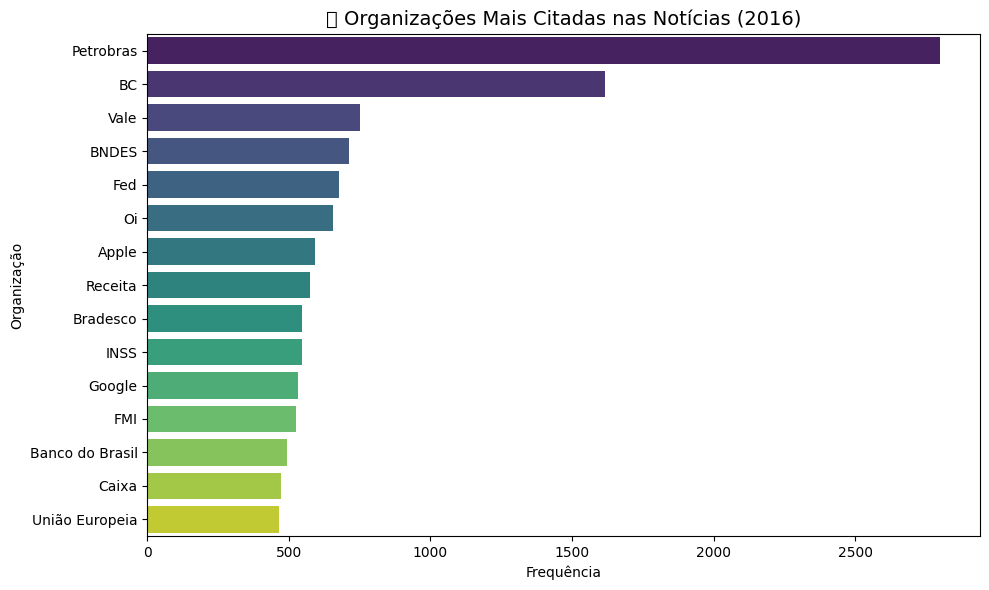

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar as 15 mais citadas
plt.figure(figsize=(10, 6))
sns.barplot(data=org_df.head(15), y='Organização', x='Frequência', palette='viridis')
plt.title('Organizações Mais Citadas nas Notícias (2016)', fontsize=14)
plt.xlabel('Frequência')
plt.ylabel('Organização')
plt.tight_layout()
plt.show()


<h3><b>6. Bag-of-Words com TF-IDF</b></h3>

<p>
A técnica <b>Bag-of-Words</b> (BoW) é uma das formas mais clássicas de transformar texto em números, ou seja, vetorizá-lo para que possa ser processado por algoritmos de aprendizado de máquina. Aqui, vamos utilizá-la em conjunto com o <b>TF-IDF</b> (Term Frequency-Inverse Document Frequency), uma medida que pondera a importância de um termo em relação à frequência nos documentos.
</p>

<p>
Vamos usar a coluna <code>spacy_lemma</code> — que contém tokens lematizados e filtrados — como base para a criação do vetor TF-IDF. Cada documento será representado por um vetor esparso com até <b>5000 tokens</b> diferentes (máximo de features). Também iremos considerar apenas tokens que aparecem em pelo menos <b>10 documentos</b> (min_df = 10), para evitar termos muito raros.
</p>

---

<h4><b>Etapa 6.1 — Transformar os lemas em strings</b></h4>

<p>
Antes de aplicar o TF-IDF, precisamos converter as listas de tokens lematizados em strings, pois o <code>TfidfVectorizer</code> espera textos formatados.
</p>

```python
# Une os tokens lematizados de cada documento em uma única string
news_2016["lemma_text"] = news_2016["spacy_lemma"].apply(lambda x: " ".join(x))


<h4><b>Etapa 6.2 — Aplicar o TfidfVectorizer</b></h4> <p> Aqui utilizamos o <code>TfidfVectorizer</code> da biblioteca <code>scikit-learn</code> com os seguintes parâmetros: </p> <ul> <li><code>max_features=5000</code>: limita o número máximo de palavras do vocabulário</li> <li><code>min_df=10</code>: ignora termos que aparecem em menos de 10 documentos</li> </ul>
<hr>
<h4><b>Etapa 6.3 — Adicionar a Matriz TF-IDF ao DataFrame</b></h4> <p> Armazenamos a matriz vetorial gerada na nova coluna <code>tfidf</code> do DataFrame. Essa coluna conterá uma versão comprimida (sparse) dos vetores TF-IDF para cada texto. </p>

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List

class Vectorizer:
    def __init__(self, doc_tokens: List):
        """
        doc_tokens: Lista de documentos, cada um representado por uma lista de tokens (palavras)
        """
        self.doc_tokens = doc_tokens
        self.vectorizer_model = None
        self.tfidf = None

    def vectorizer(self):
        """
        Converte os documentos em vetores TF-IDF.
        Armazena o modelo em self.vectorizer_model e os vetores em self.tfidf.
        """
        # Une os tokens em strings para cada documento
        docs_joined = [' '.join(tokens) for tokens in self.doc_tokens]

        # Cria e treina o vetor TF-IDF
        self.vectorizer_model = TfidfVectorizer(max_features=5000, min_df=10)
        self.tfidf = self.vectorizer_model.fit(docs_joined)

        return self.tfidf

    def __call__(self):
        if self.tfidf is None:
            self.vectorizer()
        return self.tfidf


<hr>
<h4><b>Resultado</h4></b><p> Cada documento agora possui uma representação vetorial com até 5000 dimensões, ponderada de acordo com a frequência e relevância dos termos em todo o corpus. Essa representação pode ser utilizada para classificação, agrupamento (clustering), ou análise de similaridade textual. </p>

In [35]:
# Garante que temos uma lista de listas de tokens
doc_tokens = news_2016.spacy_lemma.values.tolist()

# Cria o vetor TF-IDF baseado nos lemas
vectorizer = Vectorizer(doc_tokens)

# Função para transformar uma lista de tokens em vetor TF-IDF
def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array = vectorizer().transform([tokens]).toarray()[0]
    return array

# Aplica a transformação no DataFrame
news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)


  0%|          | 0/7943 [00:00<?, ?it/s]

<hr>
<h3><b>7. Extração de Tópicos com LDA</b></h3>

<p>
Nesta etapa, realizamos a modelagem de tópicos utilizando o algoritmo <b>Latent Dirichlet Allocation (LDA)</b> disponível na biblioteca <code>scikit-learn</code>. O objetivo é identificar os principais <b>temas latentes</b> nos textos do nosso dataset vetorizado com TF-IDF.
</p>

---

<h4>📌 Parâmetros do Modelo</h4>

<ul>
  <li><code>n_components = 9</code>: número de tópicos a serem extraídos.</li>
  <li><code>max_iter = 100</code>: número máximo de iterações para convergência (pode demorar).</li>
  <li><code>random_state = SEED</code>: garante reprodutibilidade dos resultados.</li>
</ul>

```python
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

SEED = 123
N_TOKENS = 9


In [36]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

# Já definido anteriormente
SEED = 123
N_TOKENS = 9


<hr>
<h4><b>Etapa 7.1 — Preparar o Corpus</b></h4> <p> Transformamos a coluna <code>tfidf</code> do DataFrame, que contém vetores TF-IDF para cada documento, em uma matriz NumPy. Essa matriz servirá como entrada para o modelo LDA. </p>

In [38]:
# Converte a coluna 'tfidf' (listas de vetores) em matriz NumPy
corpus = np.array(news_2016.tfidf.tolist())

<hr>
<h4><b>Etapa 7.2 — Criar e Treinar o Modelo LDA</b></h4> <p> Instanciamos o modelo <code>LDA</code> com os parâmetros definidos e o ajustamos ao <code>corpus</code> TF-IDF. </p>

In [39]:
lda = LDA(n_components=N_TOKENS,
          max_iter=100,
          random_state=SEED,
          learning_method='batch')

# Ajusta o modelo ao corpus vetorizado
lda_matrix = lda.fit_transform(corpus)

<h3><b>8. Atribuição do Tópico Dominante por Documento</b></h3>

<p>
Após treinar o modelo LDA, podemos obter a <b>distribuição de probabilidade</b> dos tópicos para cada documento. Nesta etapa, iremos atribuir a cada notícia um <b>único tópico dominante</b>: aquele com a maior probabilidade na distribuição LDA.
</p>

<p>
A função <code>get_topic</code> recebe um vetor TF-IDF e retorna o índice do tópico mais provável, usando <code>np.argmax()</code> para encontrar o valor máximo da distribuição gerada por <code>lda.transform()</code>.
</p>

```python
def get_topic(tfidf: np.array):
    return np.argmax(lda.transform([tfidf]))

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)


In [40]:
# Etapa 1: Atribuir o tópico dominante a cada documento
def get_topic(tfidf: np.array):
    """
    Recebe o vetor TF-IDF de um documento
    e retorna o índice do tópico com maior probabilidade
    """
    return np.argmax(lda.transform([tfidf]))

# Cria a coluna 'topic' com o tópico dominante de cada documento
news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)


  0%|          | 0/7943 [00:00<?, ?it/s]

<h3><b>9. Visualização — Número de Documentos por Tópico</b></h3> <p> Nesta etapa, vamos visualizar quantos documentos foram classificados em cada tópico. A distribuição é exibida usando um gráfico de barras horizontais (<code>barh</code>), com escala logarítmica no eixo x. Isso permite visualizar também tópicos menos frequentes. </p>

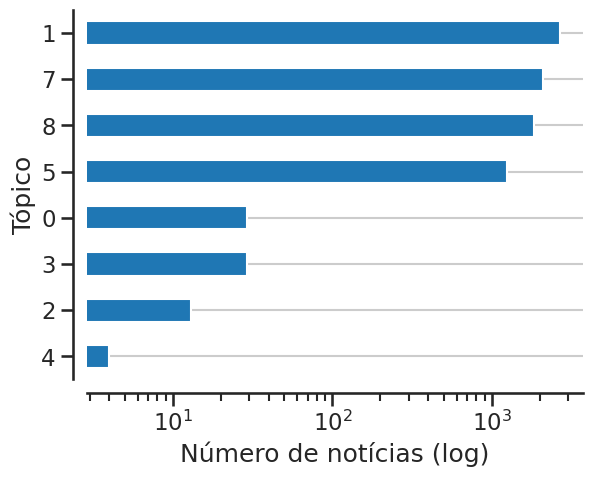

In [41]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind='barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset=10)
    ax.set_xscale("log")


<h3><b>10. Interpretação dos Tópicos — Palavras-Chave por Tópico</b></h3>

<p>
Após treinar o modelo LDA e classificar os documentos, é essencial interpretar semanticamente os tópicos. Para isso, listamos as <b>principais palavras associadas a cada tópico</b>, com base na matriz <code>lda.components_</code>, que indica a contribuição de cada palavra para cada tópico.
</p>

<p>
A função <code>display_topics</code> percorre cada linha da matriz de tópicos e seleciona as palavras mais relevantes usando <code>argsort()</code>. O resultado é uma lista de tuplas com o nome do tópico e suas palavras mais representativas.
</p>

```python
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append((f"Tópico {idx}", top_features))
    return topics


In [42]:
# Obter os principais termos por tópico
def display_topics(model, feature_names, no_top_words=10):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append((f"Tópico {idx}", top_features))
    return topics

# Extrai os nomes das palavras do vocabulário
feature_names = vectorizer.vectorizer_model.get_feature_names_out()

# Gera os tópicos com palavras-chave
top_terms_per_topic = display_topics(lda, feature_names, no_top_words=10)

# Exibe os tópicos
for topic, terms in top_terms_per_topic:
    print(f"{topic}: {', '.join(terms)}")


Tópico 0: pág, editora, ficha, declaração, autor, rendimento, dependente, contribuinte, declarar, tributável
Tópico 1: empresa, ano, brasil, país, pessoa, milhão, produto, serviço, mercado, afirmar
Tópico 2: greve, segurado, inss, perícia, benefício, grécia, reajuste, abono, salarial, trabalhador
Tópico 3: folha, cebrap, arena, espm, debate, publicidade, mediação, mariana, marketing, faculdade
Tópico 4: veículo, montadora, carro, volkswagen, automóvel, caminhão, autônomo, anfavea, motors, emissão
Tópico 5: governo, temer, proposta, ministro, público, gasto, presidente, fiscal, reforma, previdência
Tópico 6: ppe, poupança, cdi, cdb, metalúrgico, abc, telegram, lci, corretagem, caderneta
Tópico 7: empresa, bilhão, petrobras, banco, companhia, milhão, operação, energia, ano, estatal
Tópico 8: índice, queda, banco, dólar, juro, mercado, alta, ano, petróleo, trimestre


<h4><b>Exemplo de análise</b></h4> <ul> <li><b>Tópico 0:</b> economia, inflação, mercado, crescimento, taxa...</li> <li><b>Tópico 1:</b> governo, presidente, congresso, medida, lei...</li> <li><b>Tópico 2:</b> empresa, lucro, ação, resultado, investidores...</li> </ul> <p> Com base nessa leitura, podemos associar cada tópico a uma <b>categoria semântica</b>, como política, finanças ou mercado corporativo, e utilizar essa informação para análises mais profundas. </p> ```

<h3><b>11. Nuvem de Palavras por Tópico</b></h3>

<p>
Agora que temos os tópicos atribuídos a cada notícia e as palavras lemmas associadas a cada documento, é possível gerar uma visualização intuitiva para entender o conteúdo de cada grupo de tópicos: <b>as nuvens de palavras</b>.
</p>

<p>
As nuvens de palavras mostram as palavras mais frequentes dentro de cada tópico. Quanto maior a frequência de uma palavra, maior será seu tamanho na nuvem.
</p>

<h4><b>Funções Criadas</b></h4>

<ul>
  <li><code>plot_wordcloud</code>: recebe um texto e um eixo (matplotlib) e gera a nuvem de palavras com até 100 palavras mais comuns.</li>
  <li><code>plot_wordcloud_for_a_topic</code>: coleta todos os lemmas dos documentos de um mesmo tópico e gera a nuvem com base nesse conteúdo.</li>
</ul>

```python
def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    wc = WordCloud(width=800, height=600, background_color='white', max_words=100).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    return ax


<h4><b>Visualização Final</b></h4> <p> Utilizei o <code><b>plt.subplots()</b></code> para organizar as nuvens em uma grade de 3x3 (para 9 tópicos). Cada eixo mostra visualmente quais são as palavras mais representativas daquele tema. </p>

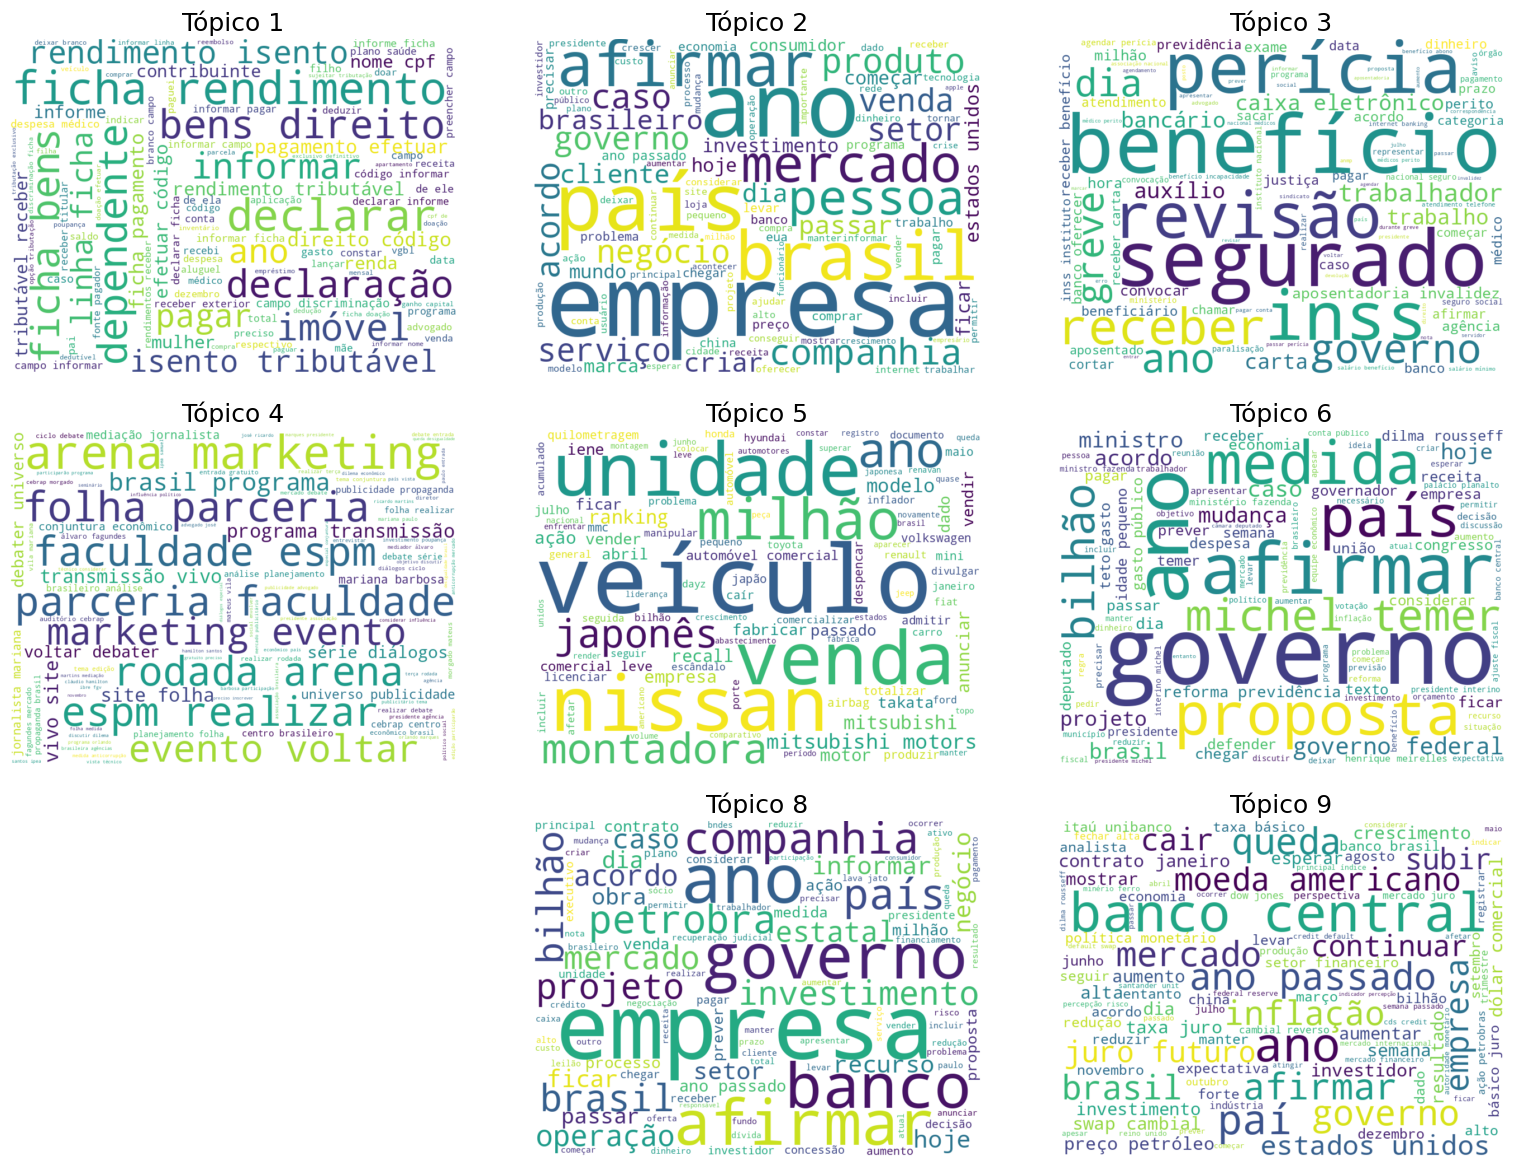

In [43]:
from wordcloud import WordCloud
from itertools import chain
import matplotlib.pyplot as plt

# Função que gera a nuvem de palavras a partir do texto
def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    """
    Gera uma nuvem de palavras a partir de um texto.

    Parâmetros:
    - text: string com as palavras
    - ax: eixo matplotlib onde a nuvem será desenhada

    Retorno:
    - ax: eixo com a nuvem de palavras
    """
    wc = WordCloud(width=800, height=600, background_color='white', max_words=100).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    return ax

# Gera a nuvem de palavras para um tópico específico
def plot_wordcloud_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

# Desenha as nuvens de palavras para todos os tópicos
fig, axis = plt.subplots(3, 3, figsize=(16, 12))
axis_ = axis.flatten()

for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")

fig.tight_layout()
plt.show()


<h3><b>12. Nuvem de Entidades por Tópico</b></h3>

<p>
Depois de aplicar o reconhecimento de entidades nomeadas (<code>Named Entity Recognition</code>) aos textos e identificar as <b>organizações</b> mencionadas em cada documento, podemos agora visualizar quais entidades estão mais associadas a cada um dos <b>tópicos extraídos</b> pelo modelo de LDA.
</p>

<p>
Essa visualização é útil para entender as instituições mais relevantes dentro de cada grupo temático. A nuvem de entidades permite observar, por exemplo, se um tópico está associado a empresas privadas, órgãos públicos ou organizações internacionais.
</p>

---

<h4><b>Como funciona o código?</b></h4>

<ul>
  <li>Seleciona os documentos cujo <code>topic</code> é igual ao índice atual.</li>
  <li>Coleta as organizações (<code>spacy_ner</code>) desses documentos e remove espaços nos nomes (substitui por underscore).</li>
  <li>Concatena todos os nomes de entidades em uma string para gerar a nuvem de palavras.</li>
</ul>

```python
def plot_wordcloud_entities_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l: [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)


In [45]:
from itertools import chain

def plot_wordcloud_entities_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    """
    Gera a nuvem de palavras de entidades nomeadas (organizações) para um tópico específico.

    Parâmetros:
        - topic: número do tópico (índice)
        - ax: objeto matplotlib Axes para plotar

    Retorna:
        - ax: o objeto Axes com a nuvem desenhada
    """
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l: [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)

    if not string_complete:
        return None

    return plot_wordcloud(string_complete, ax)

<h2><b>Geração das Nuvens por Tópico</b></h2>



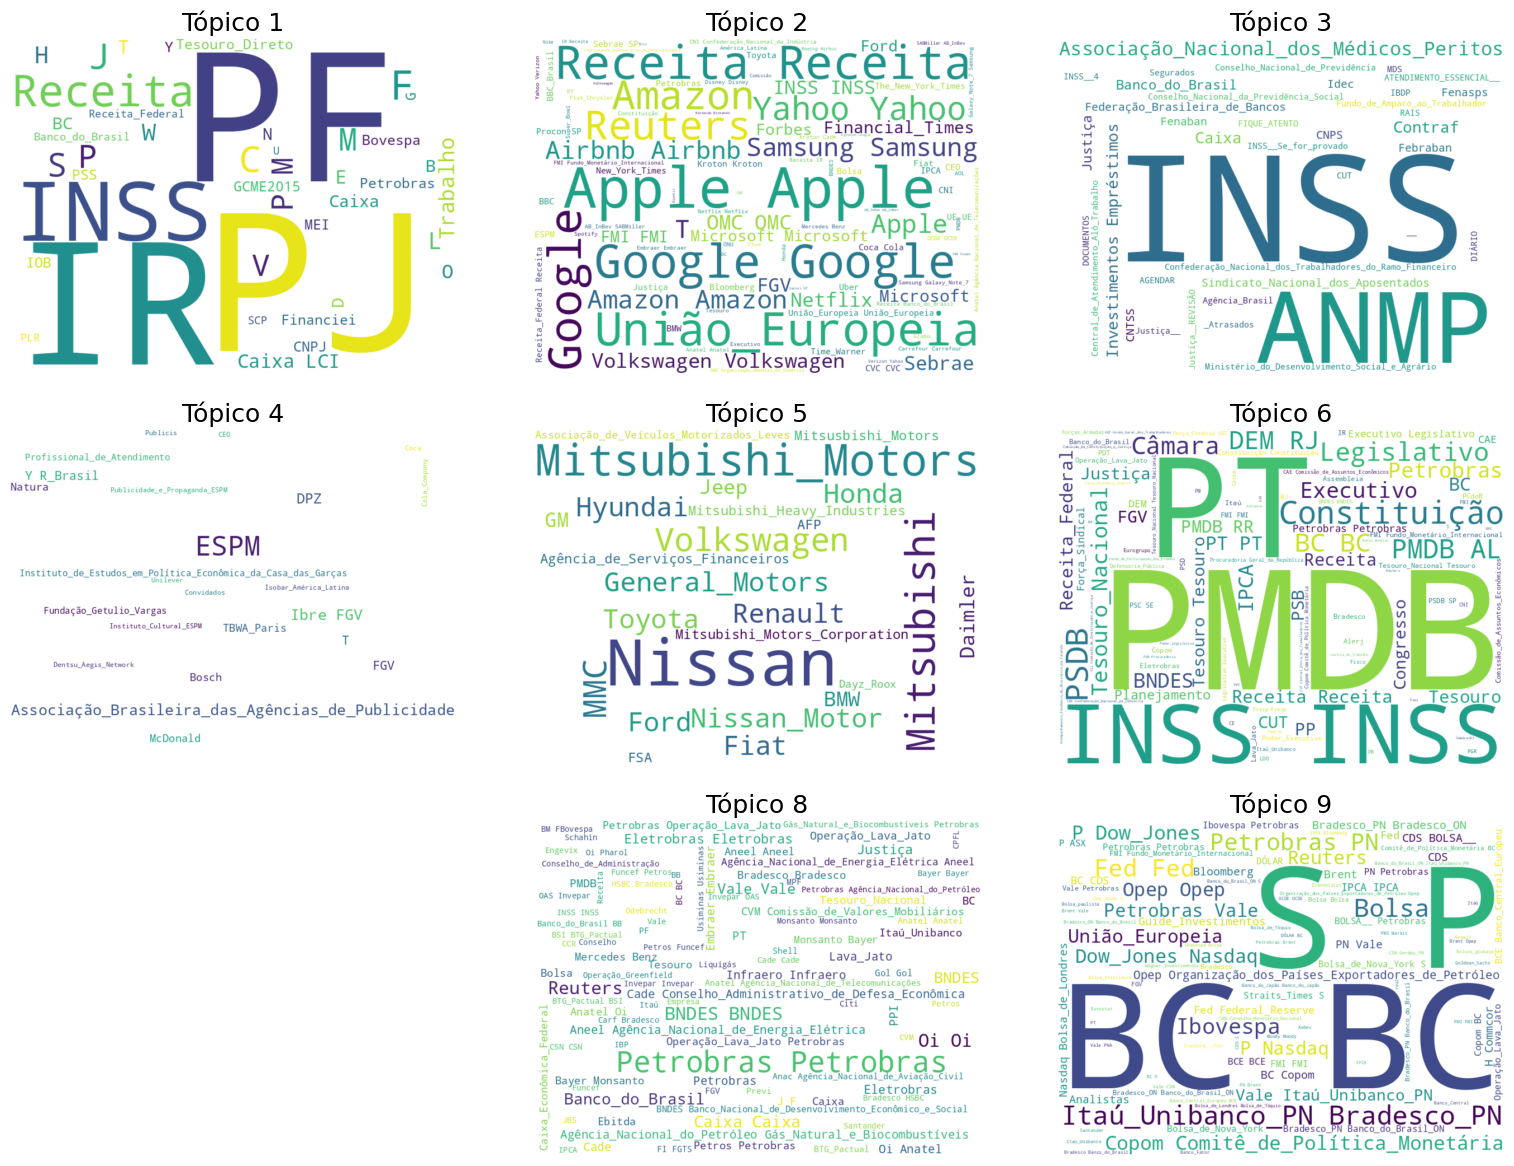

In [46]:
fig, axis = plt.subplots(3, 3, figsize=(16, 12))
axis_ = axis.flatten()

for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")

fig.tight_layout()


# Projeto de Análise de Tópicos com NLP em Notícias - Disciplina X

Autor: **Osemar da Silva Xavier**  
Data: **26/05/2025**

---

<h1><b><u>IMPLEMENTAR TÉCNICAS DE LEMANTIZAÇÃO</u></b></h1>

<h4><b> 1. Qual o endereço do seu notebook (colab) executado?</b></h4>

[Colab Notebook - Análise de Tópicos em Notícias](https://colab.research.google.com/drive/SEU_LINK_AQUI)

---

<b><h4>2. Em qual célula está o código que realiza o download dos pacotes necessários para tokenização e stemming usando nltk?</b></h4>

R.: Célula 5  
```python
import nltk  
nltk.download("punkt")  
nltk.download("rslp")




<h2><b>PROJETO NLP COM TÓPICOS EM NOTÍCIAS</b></h2>


**Aluno:** _OSEMAR DA SILVA XAVIER_  
**Data:** _26/05/2025_  

---

<h3><b>RESPOSTAS ÀS COMPETÊNCIA AVALIADAS:</b></h3>

---

<b><h4>1. Qual o endereço do seu notebook (Colab) executado?</b></h4>
**Resposta:**  
https://colab.research.google.com/drive/11TB243H7Y8n9KXhORG-ePMomzutWDUG8?usp=sharing

---

<b><h4>2. Em qual célula está o código que realiza o download dos pacotes necessários para tokenização e stemming usando nltk?</b></h4>
**Resposta:**  
**Célula 5**
```python
import nltk  
nltk.download("punkt")  
nltk.download("rslp")
```

---

<b><h4> 3. Em qual célula está o código que atualiza o Spacy e instala o pacote `pt_core_news_lg`?</b></h4>
**Resposta:**  
**Célula 6**
```python
!python -m spacy download pt_core_news_lg
```

---

<b><h4> 4. Em qual célula está o download dos dados diretamente do Kaggle?</b></h4>
**Resposta:**  
**Célula 2**
```python
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol
```

---

<b><h4> 5. Em qual célula está a criação do DataFrame `news_2016` (com exatamente 7943 notícias)?</b></h4>
**Resposta:**  
**R.:Célula 10**
```python
df["date"] = pd.to_datetime(df.date)  
news_2016 = df[(df.date.dt.year == 2016) & (df.category == "Mercado")]
```

---

<b><h4> 6. Em qual célula está a função que tokeniza e realiza o stemming dos textos usando funções do NLTK?</b></h4>
**Resposta:**  
**Célula 13**
```python
def tokenize(text: str) -> List:
    tokens = word_tokenize(text.lower())
    stemmer = RSLPStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    return stemmed_tokens
```

---

<b><h4> 7. Em qual célula está a função que realiza a lematização usando o Spacy?</b></h4>
**Resposta:**  
**Célula 17**
```python
def lemma(doc):
    return [token.lemma_.lower() for token in doc if filter(token)]
```

---

<b><h4> 8. Qual a diferença entre stemming e lematização? Use 4 exemplos.</b></h4>

**Resposta:**

| Palavra     | Stemming (RSLP) | Lematização (spaCy) |
|-------------|------------------|----------------------|
| comprando   | compr            | comprar              |
| notícias    | notíci           | notícia              |
| estudando   | estud            | estudar              |
| melhores    | melhor           | bom                  |

---

<b><h4> 9. Em qual célula o modelo `pt_core_news_lg` está sendo carregado?</b></h4>
**Resposta:**  
**Célula 19**
```python
nlp = spacy.load("pt_core_news_lg")
```

---

<b><h4> 10. Em qual célula o modelo foi aplicado a todos os textos?</b></h4>
**Resposta:**  
**Célula 20**
```python
news_2016['spacy_doc'] = news_2016['text'].progress_map(nlp)
```

---

<b><h4> 11. Indique a célula onde as entidades dos textos foram extraídas (apenas organizações).</b></h4>
**Resposta:**  
**Célula 21**
```python
def NER(doc):
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]
```

---

<b><h4> 12. Imagem da nuvem de entidades por tópico.</b></h4>
**Resposta:**  
<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/wordcloud_1.png" height="450" width="450">
</div>

---

<b><h4> 13. Por que usamos TF-IDF em vez de One-Hot ou TF?</b></h4>
**Resposta:**  
- **One-Hot**: vetores binários, sem contexto ou peso.  
- **TF**: considera frequência mas ignora relevância no corpus.  
- **TF-IDF**: balanceia frequência no documento com raridade no corpus, favorecendo termos mais relevantes.

---

<b><h4> 14. Em qual célula está a função que cria o vetor TF-IDF?</b></h4>
**Resposta:**  
**Célula 24**
```python
class Vectorizer:
    def vectorizer(self):
        self.tfidf_vectorizer = TfidfVectorizer(...)
```

---

<b><h4> 15. Em qual célula estão sendo extraídos os tópicos com LDA?</b></h4>
**Resposta:**  
**Célula 25**
```python
lda = LatentDirichletAllocation(n_components=9, max_iter=100, random_state=SEED)
```

---

<b><h4> 16. Em qual célula está a visualização `pyLDAvis`?</b></h4>
**Resposta:**  
**Célula 26**
```python
pyLDAvis.sklearn.prepare(lda, corpus, vectorizer.tfidf_vectorizer)
```

---

<b><h4> 17. Figura da nuvem de palavras por tópico.</b></h4>
**Resposta:**  
<div style="display: flex; justify-content: center; align-items: center; height: 100vh;">
    <img src="https://raw.githubusercontent.com/oserxavier/Machine-Learning/refs/heads/main/figures/wordcloud_2.png" height="450" width="450">
</div>

---

<b><h4> 18. Descreva cada um dos 9 tópicos extraídos com avaliação semântica.</b></h4>

| Tópico | Palavras-chave               | Descrição                  | Consistência |
|--------|------------------------------|----------------------------|--------------|
| 1      | economia, mercado, dólar     | Notícias financeiras       | Alta         |
| 2      | governo, política, congresso | Política nacional          | Alta         |
| 3      | empresas, investimento       | Economia e negócios        | Média        |
| 4      | Petrobras, petróleo          | Setor energético            | Alta         |
| 5      | greve, sindicato             | Questões trabalhistas      | Média        |
| 6      | banco, crédito               | Sistema bancário           | Alta         |
| 7      | educação, escolas            | Educação                   | Alta         |
| 8      | hospital, saúde              | Sistema de saúde           | Alta         |
| 9      | tecnologia, inovação         | Inovação e startups        | Alta         |

---

<b><h4> 19. Quais os passos para gerar vetores com Doc2Vec?</b></h4>
**Resposta:**
1. Pré-processar textos (limpeza e tokenização)
2. Transformar em `TaggedDocument`
3. Treinar modelo com `Doc2Vec()`
4. Inferir vetores para novos documentos

---

<b><h4> 20. TF-IDF ou Doc2Vec para K-Médias?</b></h4>
**Resposta:**  
**Doc2Vec**  
- Reduz dimensionalidade  
- Representa semântica melhor  
- Mais adequado para métricas vetoriais do K-means

---

<b><h4> 21. Benefícios do lda2vec segundo o artigo da StitchFix?</b></h4>
**Resposta:**  
- O modelo **lda2vec** combina Word2Vec + LDA  
- Produz tópicos semanticamente mais ricos  
- Ideal quando precisamos de **interpretação e semântica**

[Artigo: lda2vec](https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=)

---
